# Two views of mixture modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pomegranate import *

In [2]:
n = 50_000

## Synthetic mixture model 

In [3]:
# Model for height data in inches
# https://tasks.illustrativemathematics.org/content-standards/HSS/ID/A/4/tasks/1020
men = NormalDistribution(70.0, 3.0)
women = NormalDistribution(64.5, 2.5)
model = GeneralMixtureModel([men, women], [0.5, 0.5])

In [4]:
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                70.0,
                3.0
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                64.5,
                2.5
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.5,
        0.5
    ]
}

In [5]:
heights = model.sample(n)

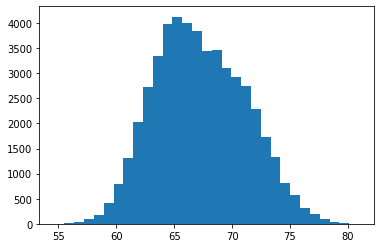

In [6]:
plt.hist(heights, bins=31)
plt.show()

## Analytic mixture model 

In [7]:
# Now fit a mixture model to the sample.
# We're going to fit a "wrong" model on purpose.
alt_model = GeneralMixtureModel.from_samples(
    GammaDistribution,
    n_components=2,
    X=np.asarray([heights]).T.copy())

In [8]:
alt_model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "GammaDistribution",
            "parameters" : [
                526.925378432463,
                8.06706405884796
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "GammaDistribution",
            "parameters" : [
                752.6748594107016,
                10.57777262889179
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.6691624300830464,
        0.3308375699169536
    ]
}

In [9]:
alt_heights = alt_model.sample(n)

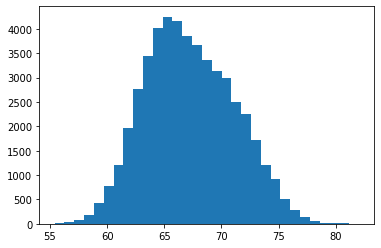

In [10]:
plt.hist(alt_heights, bins=31)
plt.show()

## Comparison

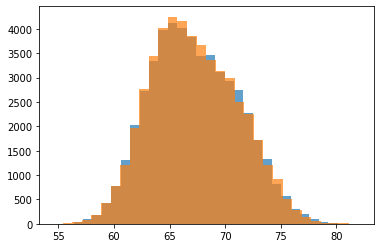

In [11]:
plt.hist(heights, bins=31, alpha=0.7)
plt.hist(alt_heights, bins=31, alpha=0.7)
plt.show()

In [12]:
pd.DataFrame(heights).describe()

,0
count,50000.000000
mean,67.249593
std,3.897973
min,54.674344
25%,64.341297
50%,66.965930
75%,70.099897
max,80.968657


In [13]:
pd.DataFrame(alt_heights).describe()

,0
count,50000.000000
mean,67.231499
std,3.889961
min,55.406215
25%,64.344649
50%,66.930211
75%,70.048437
max,82.034912
